# Método simplex

Este notebook detalha como achar a solução de um problema de programação linear com o método Simplex.

## Problema

Maximize

$$\max F = 10x_1 + 7x_2$$

Sujeito a 

$$
\begin{align} 
2x_1 + x_2 &\leq 5000 \\
4x_1 + 5x_2 &\leq 15000 \\
x_1, x_2 &\geq 0
\end{align}
$$

## Visualização 

Um problema de programação linear é delimitado por equações lineares em um espaço euclidiano:

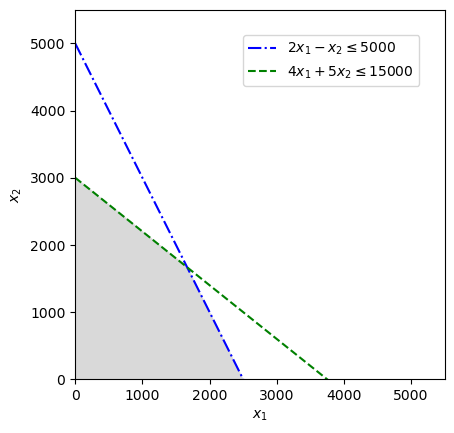

In [10]:
# código adaptado de https://stackoverflow.com/a/57017638/2202739

from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# projeta a área da solução
d = np.linspace(start=0, stop=10000, num=1000)
x1, x2 = np.meshgrid(d, d)
ax.imshow(
    (((2*x1 + x2) <= 5000) & ((4*x1 + 5*x2) <= 15000) & (x1 >= 0) & (x2 >= 0)).astype(int), 
    extent=(x1.min(), x1.max(), x2.min(), x2.max()),
    origin="lower", 
    cmap="Greys", alpha=0.15
)

# projeta as funções que delimitam a área
x = np.linspace(start=0, stop=10000, num=1000)

y1 = 5000 - 2*x  # pega-se a primeira restrição e isola-se x2
y2 = 3000 - (4./5.)*x  # pga-se a segunda restrição e isola-se x2

# desenha linhas de restrições
ax.plot(x, y1, label='$2x_1 - x_2 \\leq 5000$', linestyle='dashdot', color='blue', zorder=0)
ax.plot(x, y2, label='$4x_1 + 5x_2 \\leq 15000$', linestyle='dashed', color='green', zorder=0)
ax.set_xlim(0, 5500)
ax.set_ylim(0, 5500)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.legend(bbox_to_anchor=(0.95, 0.95), loc='upper right')
plt.show()

As soluções para o problema estão nos vértices:

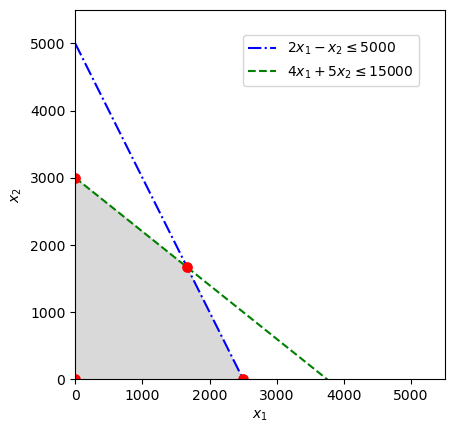

In [33]:
# código adaptado de https://stackoverflow.com/a/57017638/2202739

from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# projeta a área da solução
d = np.linspace(start=0, stop=10000, num=1000)
x1, x2 = np.meshgrid(d, d)
ax.imshow(
    (((2*x1 + x2) <= 5000) & ((4*x1 + 5*x2) <= 15000) & (x1 >= 0) & (x2 >= 0)).astype(int), 
    extent=(x1.min(), x1.max(), x2.min(), x2.max()),
    origin="lower", 
    cmap="Greys", alpha=0.15
)

# projeta as funções que delimitam a área
x = np.linspace(start=0, stop=10000, num=1000)

y1 = 5000 - 2*x  # pega-se a primeira restrição e isola-se x2
y2 = 3000 - (4./5.)*x  # pga-se a segunda restrição e isola-se x2

# desenha linhas de restrições
ax.plot(x, y1, label='$2x_1 - x_2 \\leq 5000$', linestyle='dashdot', color='blue', zorder=0)
ax.plot(x, y2, label='$4x_1 + 5x_2 \\leq 15000$', linestyle='dashed', color='green', zorder=0)

# desenha vértices de soluções
ax.scatter(0, 0, color='red', s=45, zorder=1)  # x1 e x2 = 0
ax.scatter(0, (3000 - (4./5.)*0), color='red', s=45, zorder=1)  # x = 0 e y2 calcula-se com base nisto
ax.scatter((-5000)/(-2), 0, color='red', s=45, zorder=1)   # y1 = 0 e x calcula-se com base nisto
ax.scatter(10000/6, (5000 - 2 * (10000/6)), color='red', s=45, zorder=1)   # onde y1 e y2 são iguais
ax.set_xlim(0, 5500)
ax.set_ylim(0, 5500)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.legend(bbox_to_anchor=(0.95, 0.95), loc='upper right')
plt.show()

## Preparação

Antes de resolver o sistema, devemos introduzir variáveis de folga (chamadas _slack_ em inglês) para tornar as inequações em equações:

$$
\begin{align} 
2x_1 + x_2 + s_1 &= 5000 \\
4x_1 + 5x_2 + s_2 &= 15000 \\
\end{align}
$$

Dizemos que uma variável está solta quando ela está do lado esquerdo das equações, e apertada quando ela está do lado direito. Logo, precisamos soltar as variáveis de folga $s_1$ e $s_2$:

$$
\begin{align} 
s_1 &= 5000 - 2x_1 - x_2 \\
s_2 &= 15000 -4x_1 - 5x_2 \\
\end{align}
$$

## Simplex

O algoritmo de simplex consiste em 3 passos:

1. Escolher qual variável será solta, usando a regra de Dantzig
2. Apertar uma variável
3. Resolver algebricamente as equações
4. Repetir até que todas as variáveis de folga estejam presas

## Regra de Dantzig

A variável que será solta é aquela com o maior coeficiente na função objetivo. Isto significa dizer que é a que tem o maior incremento em direção ao ótimo global.

No caso, a variável com o maior coeficiente na função objetivo $F = 10x_1 + 7x_2$ é $x_1$ pois seu coeficiente é $10$.

Nesta etapa, escolhe-se qual **eixo** o movimento será feito.

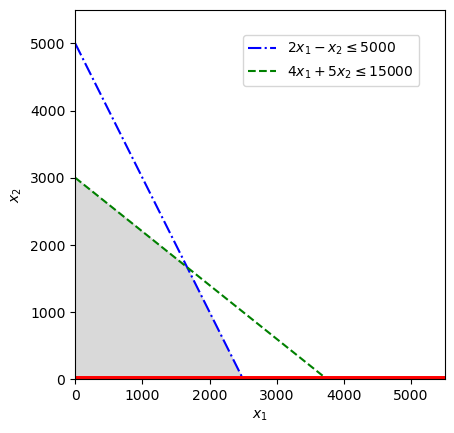

In [26]:
# código adaptado de https://stackoverflow.com/a/57017638/2202739

from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# projeta a área da solução
d = np.linspace(start=0, stop=10000, num=1000)
x1, x2 = np.meshgrid(d, d)
ax.imshow(
    (((2*x1 + x2) <= 5000) & ((4*x1 + 5*x2) <= 15000) & (x1 >= 0) & (x2 >= 0)).astype(int), 
    extent=(x1.min(), x1.max(), x2.min(), x2.max()),
    origin="lower", 
    cmap="Greys", alpha=0.15
)

# projeta as funções que delimitam a área
x = np.linspace(start=0, stop=10000, num=1000)

y1 = 5000 - 2*x  # pega-se a primeira restrição e isola-se x2
y2 = 3000 - (4./5.)*x  # pga-se a segunda restrição e isola-se x2

# desenha linhas de restrições
ax.plot(x, y1, label='$2x_1 - x_2 \\leq 5000$', linestyle='dashdot', color='blue', zorder=0)
ax.plot(x, y2, label='$4x_1 + 5x_2 \\leq 15000$', linestyle='dashed', color='green', zorder=0)

plt.axhline(y=0, color='red', linewidth=5.)
ax.set_xlim(0, 5500)
ax.set_ylim(0, 5500)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.legend(bbox_to_anchor=(0.95, 0.95), loc='upper right')
plt.show()

## Apertar uma variável

Uma vez selecionada a variável $x_1$, é preciso ver em qual das duas equações, $s_1 = 5000 - 2x_1 - x_2$ e $s_2 = 15000 -4x_1 - 5x_2$, ela será apertada.
No caso, escolhe-se a equação na qual o **menor** incremento é descoberto:

$$
\begin{align}
s_1 &= 5000 - 2x_1 - x_2 \\
0 &= 5000 - 2x_1 - 0 \\
2x_1 &= 5000 \\
x_1 &= 2500
\end{align}
$$

$$
\begin{align}
s_2 &= 15000 -4x_1 - 5x_2 \\
0 &= 15000 -4x_1 - 5*0 \\
4x_1 &= 15000 \\
x_1 &= 3750
\end{align}
$$

Logo, deve-se soltar $x_1$ na primeira equação, e apertar $s_1$.

## Resolver algebricamente as equações

O processo de soltar $x_1$ e apertar $s_1$ envolve resolver a equação algebricamente:

$$
\begin{align}
s_1 &= 5000 - 2x_1 - x_2 \\
2x_1 &= 5000 - x_2 - s_1 \\
x_1 &= \frac{5000}{2} - \frac{1}{2}x_2 - \frac{1}{2}s_1 \\
x_1 &= 2500 - \frac{1}{2}x_2 - \frac{1}{2}s_1
\end{align}
$$

E fazer as substituições necessárias:

$$
\begin{align}
s_2 &= 15000 -4x_1 - 5x_2 \\
s_2 &= 15000 -4(2500 - \frac{1}{2}x_2 - \frac{1}{2}s_1) - 5x_2 \\
s_2 &= 15000 - 10000 + 2x_2 + 4s_1 - 5x_2 \\
s_2 &= 5000 - 3x_2 + 4s_1
\end{align}
$$

---

$$
\begin{align}
F &= 10x_1 + 7x_2 \\
F &= 10(2500 - \frac{1}{2}x_2 - \frac{1}{2}s_1) + 7x_2 \\
F &= 25000 - 5x_2 - 5s_1 + 7x_2 \\
F &= 25000 + 2x_2 - 5s_1 \\
\end{align}
$$

Com isso, a variável $x_1$ foi movimentada 2500 unidades no seu eixo:

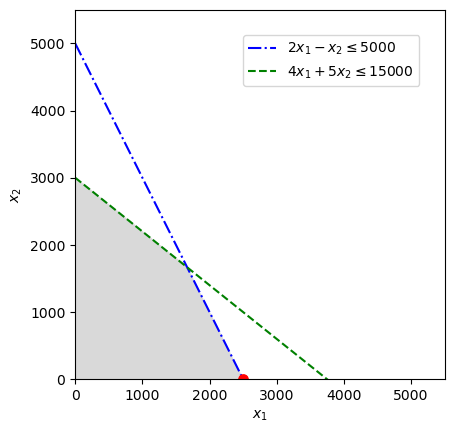

In [31]:
# código adaptado de https://stackoverflow.com/a/57017638/2202739

from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# projeta a área da solução
d = np.linspace(start=0, stop=10000, num=1000)
x1, x2 = np.meshgrid(d, d)
ax.imshow(
    (((2*x1 + x2) <= 5000) & ((4*x1 + 5*x2) <= 15000) & (x1 >= 0) & (x2 >= 0)).astype(int), 
    extent=(x1.min(), x1.max(), x2.min(), x2.max()),
    origin="lower", 
    cmap="Greys", alpha=0.15
)

# projeta as funções que delimitam a área
x = np.linspace(start=0, stop=10000, num=1000)

y1 = 5000 - 2*x  # pega-se a primeira restrição e isola-se x2
y2 = 3000 - (4./5.)*x  # pga-se a segunda restrição e isola-se x2

# desenha linhas de restrições
ax.plot(x, y1, label='$2x_1 - x_2 \\leq 5000$', linestyle='dashdot', color='blue', zorder=0)
ax.plot(x, y2, label='$4x_1 + 5x_2 \\leq 15000$', linestyle='dashed', color='green', zorder=0)

ax.scatter(2500, 0, color='red', s=45, zorder=1)   # posição da solução

ax.set_xlim(0, 5500)
ax.set_ylim(0, 5500)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.legend(bbox_to_anchor=(0.95, 0.95), loc='upper right')
plt.show()

## Repetir até que todas as variáveis de folga estejam presas

Após a primeira iteração do algoritmo simplex, o sistema está da seguinte forma:

$$\max F = 25000 + 2x_2 - 5s_1$$

Sujeito a 

$$
\begin{align}
x_1 &= 2500 - \frac{1}{2}x_2 - \frac{1}{2}s_1 \\
s_2 &= 5000 - 3x_2 + 4s_1
\end{align}
$$

1. A próxima variável com o maior coefiente é $x_2$ ;
2. Obtemos $x_2 = 5000$ substituindo $x_1$ e $s_1$ por zero na equação $x_1 = 2500 - \frac{1}{2}x_2 - \frac{1}{2}s_1$ , e $x_2 = \frac{5000}{3}$ ao fazer $x_1 = 0$ e $s_2 = 0$ em $s_2 = 5000 - 3x_2 + 4s_1$ . Logo, a equação a ser selecionada é a segunda
3. Fazendo as substituições, obtemos

   $$
   \begin{align}
   s_2 &= 5000 - 3x_2 + 4s_1 \\
   3x_2 &= 5000 + 4s_1 - s_2 \\
   x_2 &= \frac{5000}{3} + \frac{4}{3}s_1 - \frac{1}{3}s_2
   \end{align}
   $$

4. Substituindo $x_2$ nas outras equações, obtemos

$$
\begin{align}
x_1 &= 2500 - \frac{1}{2}x_2 - \frac{1}{2}s_1 \\
x_1 &= 2500 - \frac{1}{2}(\frac{5000}{3} + \frac{4}{3}s_1 - \frac{1}{3}s_2) - \frac{1}{2}s_1 \\
x_1 &= 2500 - \frac{2500}{3} - \frac{2}{3}s_1 + \frac{1}{6}s_2 - \frac{1}{2}s_1 \\
x_1 &= \frac{5000}{3} - \frac{7}{6}s_1 + \frac{1}{6}s_2 \\
\end{align}
$$

---

$$
\begin{align}
F &= 25000 + 2x_2 - 5s_1 \\
F &= 25000 + 2(\frac{5000}{3} + \frac{4}{3}s_1 - \frac{1}{3}s_2) - 5s_1 \\
F &= 25000 + \frac{10000}{3} + \frac{8}{3}s_1 - \frac{2}{3}s_2 - 5s_1 \\
F &= \frac{85000}{3} - \frac{7}{3}s_1 - \frac{2}{3}s_2 \\
\end{align}
$$

Em outras palavras, a variável $x_2$ foi movimentada $\frac{5000}{3}$ unidades em seu eixo. A solução atual está na posição $(\frac{5000}{3}, \frac{5000}{3})$ :

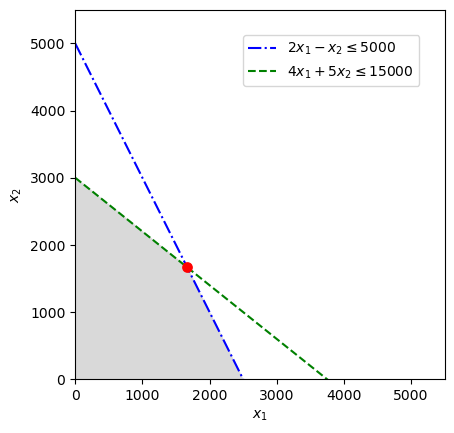

In [30]:
# código adaptado de https://stackoverflow.com/a/57017638/2202739

from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# projeta a área da solução
d = np.linspace(start=0, stop=10000, num=1000)
x1, x2 = np.meshgrid(d, d)
ax.imshow(
    (((2*x1 + x2) <= 5000) & ((4*x1 + 5*x2) <= 15000) & (x1 >= 0) & (x2 >= 0)).astype(int), 
    extent=(x1.min(), x1.max(), x2.min(), x2.max()),
    origin="lower", 
    cmap="Greys", alpha=0.15
)

# projeta as funções que delimitam a área
x = np.linspace(start=0, stop=10000, num=1000)

y1 = 5000 - 2*x  # pega-se a primeira restrição e isola-se x2
y2 = 3000 - (4./5.)*x  # pga-se a segunda restrição e isola-se x2

# desenha linhas de restrições
ax.plot(x, y1, label='$2x_1 - x_2 \\leq 5000$', linestyle='dashdot', color='blue', zorder=0)
ax.plot(x, y2, label='$4x_1 + 5x_2 \\leq 15000$', linestyle='dashed', color='green', zorder=0)

ax.scatter(5000/3, 5000/3, color='red', s=45, zorder=1)   # posição da solução

ax.set_xlim(0, 5500)
ax.set_ylim(0, 5500)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.legend(bbox_to_anchor=(0.95, 0.95), loc='upper right')
plt.show()

## Wrap it up!

O sistema está neste momento da seguinte forma:

$$\max F = \frac{85000}{3} - \frac{7}{3}s_1 - \frac{2}{3}s_2$$

Sujeito a 

$$
\begin{align}
x_1 &= \frac{5000}{3} - \frac{7}{6}s_1 + \frac{1}{6}s_2 \\
x_2 &= \frac{5000}{3} + \frac{4}{3}s_1 - \frac{1}{3}s_2
\end{align}
$$

Neste momento, não existem variáveis a serem soltas, e as duas variáveis de folga estão presas. Portanto, chegamos ao passo final do algoritmo simplex, que é anular as variáveis de folga e resolver o sistema:

$$\begin{align}
F &= \frac{85000}{3} - \frac{7}{3}s_1 - \frac{2}{3}s_2 \\
F &= \frac{85000}{3} - \frac{7}{3}*0 - \frac{2}{3}*0 \\
F &= \frac{85000}{3}
\end{align}
$$

---

$$
\begin{align}
x_1 &= \frac{5000}{3} - \frac{7}{6}s_1 + \frac{1}{6}s_2 \\
x_1 &= \frac{5000}{3} - \frac{7}{6}*0 + \frac{1}{6}*0 \\
x_1 &= \frac{5000}{3}
\end{align}
$$

--- 

$$
\begin{align}
x_2 &= \frac{5000}{3} + \frac{4}{3}s_1 - \frac{1}{3}s_2 \\
x_2 &= \frac{5000}{3} + \frac{4}{3}*0 - \frac{1}{3}*0 \\
x_2 &= \frac{5000}{3}
\end{align}
$$

Portanto, a solução ótima é $F = \frac{85000}{3}$ com os valores $x_1 = \frac{5000}{3}$ e $x_2 = \frac{5000}{3}$

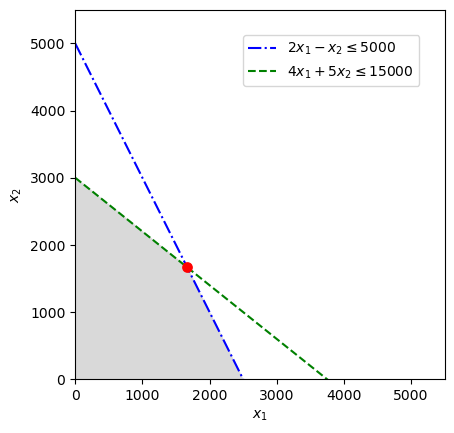

In [32]:
# código adaptado de https://stackoverflow.com/a/57017638/2202739

from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# projeta a área da solução
d = np.linspace(start=0, stop=10000, num=1000)
x1, x2 = np.meshgrid(d, d)
ax.imshow(
    (((2*x1 + x2) <= 5000) & ((4*x1 + 5*x2) <= 15000) & (x1 >= 0) & (x2 >= 0)).astype(int), 
    extent=(x1.min(), x1.max(), x2.min(), x2.max()),
    origin="lower", 
    cmap="Greys", alpha=0.15
)

# projeta as funções que delimitam a área
x = np.linspace(start=0, stop=10000, num=1000)

y1 = 5000 - 2*x  # pega-se a primeira restrição e isola-se x2
y2 = 3000 - (4./5.)*x  # pga-se a segunda restrição e isola-se x2

# desenha linhas de restrições
ax.plot(x, y1, label='$2x_1 - x_2 \\leq 5000$', linestyle='dashdot', color='blue', zorder=0)
ax.plot(x, y2, label='$4x_1 + 5x_2 \\leq 15000$', linestyle='dashed', color='green', zorder=0)

ax.scatter(5000/3, 5000/3, color='red', s=45, zorder=1)   # posição da solução

ax.set_xlim(0, 5500)
ax.set_ylim(0, 5500)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.legend(bbox_to_anchor=(0.95, 0.95), loc='upper right')
plt.show()